In [94]:
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split,cross_val_score

In [5]:
wine=load_wine()

In [3]:
wine.data.shape

(178, 13)

In [24]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(wine.data,wine.target,test_size=0.3)

In [5]:
clf=DecisionTreeClassifier(random_state=0)
rfc=RandomForestClassifier(random_state=0)

clf=clf.fit(Xtrain,Ytrain)
rfc=rfc.fit(Xtrain,Ytrain)

score_c=clf.score(Xtest,Ytest)
score_r=rfc.score(Xtest,Ytest)

print("Single Tree:{}".format(score_c),"Random Forest:{}".format(score_r))

Single Tree:0.9259259259259259 Random Forest:0.9814814814814815


In [6]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt


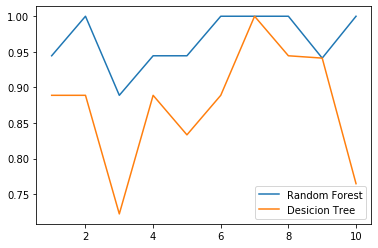

In [7]:
clf= DecisionTreeClassifier()
clf_s=cross_val_score(clf,wine.data,wine.target,cv=10)

rfc=RandomForestClassifier(n_estimators=10)
rfc_s=cross_val_score(rfc,wine.data,wine.target,cv=10)

plt.plot(range(1,11),rfc_s,label='Random Forest')
plt.plot(range(1,11),clf_s,label='Desicion Tree')
plt.legend()
plt.show()

RandomForest:
0.9441176470588235
DecisionTree:
0.865032679738562


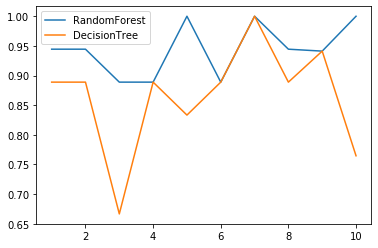

In [8]:
# 简单
label='RandomForest'
for model in [RandomForestClassifier(n_estimators=10),DecisionTreeClassifier()]:
    score=cross_val_score(model,wine.data,wine.target,cv=10)
    print("{}:".format(label)),print(score.mean())
    plt.plot(range(1,11),score,label=label)
    plt.legend()
    label="DecisionTree"

0.9888888888888889 35


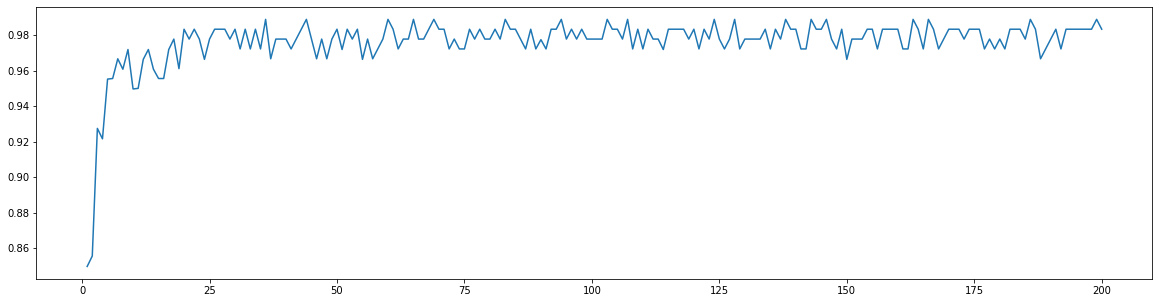

In [9]:
superpa=[]
for i in range(200):
    rfc=RandomForestClassifier(n_estimators=i+1,n_jobs=-1)
    rfc_s=cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    superpa.append(rfc_s)
print(max(superpa),superpa.index(max(superpa)))
plt.figure(figsize=[20,5])
plt.plot(range(1,201),superpa)
plt.show()

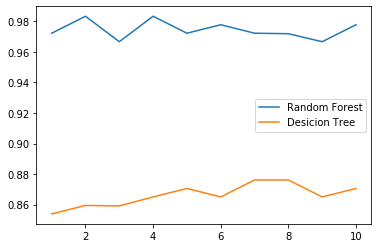

In [13]:
rfc_l=[]
clf_l=[]

for i in range(10):
    rfc=RandomForestClassifier(n_estimators=25)
    rfc_s=cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    rfc_l.append(rfc_s)
    
    clf= DecisionTreeClassifier()
    clf_s=cross_val_score(clf,wine.data,wine.target,cv=10).mean()
    clf_l.append(clf_s)

plt.plot(range(1,11),rfc_l,label='Random Forest')
plt.plot(range(1,11),clf_l,label='Desicion Tree')
plt.legend()
plt.show()

In [1]:
import numpy as np
# 求组合
from scipy.special import comb

In [2]:
np.array([comb(25,i)*(0.2**i)*(0.8**(25-i)) for i in range(13,26)]).sum()

0.00036904803455582827

In [15]:
rfc=RandomForestClassifier(n_estimators=25,random_state=2)
rfc=rfc.fit(Xtrain,Ytrain)

In [16]:
rfc.estimators_[0].max_depth

In [17]:
for i in range(len(rfc.estimators_)):
    print(rfc.estimators_[i].random_state)

1872583848
794921487
111352301
1853453896
213298710
1922988331
1869695442
2081981515
1805465960
1376693511
1418777250
663257521
878959199
854108747
512264917
515183663
1287007039
2083814687
1146014426
570104212
520265852
1366773364
125164325
786090663
578016451


In [18]:
rfc=RandomForestClassifier(n_estimators=25,oob_score=True)
rfc.fit(wine.data,wine.target)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [19]:
rfc.oob_score_

0.9719101123595506

In [20]:
rfc.feature_importances_

array([0.10186251, 0.02194311, 0.0121458 , 0.04165818, 0.02107871,
       0.04182856, 0.20048574, 0.00738261, 0.03347841, 0.15407501,
       0.04649968, 0.11351615, 0.20404553])

In [21]:
rfc.predict_proba

<bound method ForestClassifier.predict_proba of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)>

In [28]:
rfc=RandomForestClassifier(n_estimators=25)
rfc=rfc.fit(Xtrain,Ytrain)

In [29]:
rfc.score(Xtest,Ytest)

1.0

In [27]:
rfc.feature_importances_

array([0.14891685, 0.04287621, 0.00989928, 0.06226284, 0.0328053 ,
       0.04211885, 0.15380042, 0.02228224, 0.03882624, 0.12451538,
       0.0638185 , 0.11631704, 0.14156085])

In [30]:
rfc.apply(Xtest)

array([[ 7,  9,  6, ...,  3,  4,  4],
       [11,  6, 12, ...,  6,  8,  7],
       [ 9,  9, 20, ...,  6,  9,  7],
       ...,
       [ 9,  7, 12, ...,  6,  8,  7],
       [12, 17, 22, ..., 15, 16, 17],
       [12, 18, 22, ..., 15, 16, 17]], dtype=int64)

In [31]:
rfc.predict(Xtest)

array([2, 1, 1, 1, 2, 2, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 2,
       1, 0, 0, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 2, 2,
       2, 1, 2, 1, 0, 0, 0, 1, 0, 0])

In [32]:
rfc.predict_proba(Xtest)

array([[0.  , 0.04, 0.96],
       [0.  , 1.  , 0.  ],
       [0.16, 0.72, 0.12],
       [0.08, 0.92, 0.  ],
       [0.16, 0.2 , 0.64],
       [0.24, 0.2 , 0.56],
       [0.92, 0.04, 0.04],
       [0.  , 1.  , 0.  ],
       [0.16, 0.72, 0.12],
       [0.92, 0.08, 0.  ],
       [0.04, 0.84, 0.12],
       [0.  , 0.96, 0.04],
       [0.  , 1.  , 0.  ],
       [0.84, 0.12, 0.04],
       [0.76, 0.24, 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.96, 0.04],
       [0.  , 1.  , 0.  ],
       [0.04, 0.84, 0.12],
       [1.  , 0.  , 0.  ],
       [0.04, 0.96, 0.  ],
       [0.  , 0.32, 0.68],
       [0.  , 1.  , 0.  ],
       [0.96, 0.  , 0.04],
       [1.  , 0.  , 0.  ],
       [0.92, 0.04, 0.04],
       [0.84, 0.04, 0.12],
       [0.  , 0.96, 0.04],
       [1.  , 0.  , 0.  ],
       [0.08, 0.84, 0.08],
       [0.08, 0.4 , 0.52],
       [0.92, 0.04, 0.04],
       [1.  , 0.  , 0.  ],
       [0.56, 0.4 , 0.04],
       [0.92, 0.08, 0.  ],
       [0.  , 0.96, 0.04],
       [1.  , 0.  , 0.  ],
 

In [34]:
feature_name=['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类'
              ,'花青素','颜色强度','色调','od288/od315稀释葡萄酒','脯氨酸']
   
[*zip(feature_name,rfc.feature_importances_)]

[('酒精', 0.13292356228596375),
 ('苹果酸', 0.027206898112835214),
 ('灰', 0.021068823308649967),
 ('灰的碱性', 0.05422009742273116),
 ('镁', 0.014492787099040219),
 ('总酚', 0.059402443126676585),
 ('类黄酮', 0.14930619810528134),
 ('非黄烷类酚类', 0.008193645552564598),
 ('花青素', 0.021301066139171307),
 ('颜色强度', 0.17065973438760118),
 ('色调', 0.07026810705095145),
 ('od288/od315稀释葡萄酒', 0.09415879639374344),
 ('脯氨酸', 0.1767978410147898)]

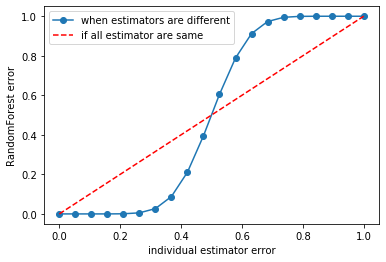

In [38]:
import numpy as np
import matplotlib.pyplot as plt
x=np.linspace(0,1,20)
y=[]
for epsilon in np.linspace(0,1,20):
    E=np.array([comb(25,i)*(epsilon**i)*((1-epsilon)**(25-i)) for i in range(13,26)]).sum()
    y.append(E)
plt.plot(x,y,'o-',label='when estimators are different')
plt.plot(x,x,'--',color='red',label='if all estimator are same')
plt.xlabel('individual estimator error')
plt.ylabel('RandomForest error')
plt.legend()
plt.show()

In [68]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [69]:
boston=load_boston()

In [70]:
regeressor=RandomForestRegressor(n_estimators=100,random_state=0)
cross_val_score(regeressor,boston.data,boston.target,cv=10
                ,scoring='neg_mean_squared_error'
               )

array([-10.72900447,  -5.36049859,  -4.74614178, -20.84946337,
       -12.23497347, -17.99274635,  -6.8952756 , -93.78884428,
       -29.80411702, -15.25776814])

In [71]:
# sklearn 模型评估指标打分列表
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [72]:


#随机森林填补缺失值
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
# 填补缺失值的类
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor


In [73]:
boston=load_boston()

In [74]:
boston.data.shape

(506, 13)

In [75]:
X_full,Y_full=boston.data,boston.target
n_samples=X_full.shape[0]
n_features=X_full.shape[1]

In [76]:
# 构造缺失值格式
rng=np.random.RandomState(0)
missing_rate=0.5
n_missing_samples=int(np.float(n_samples*n_features*missing_rate))

In [77]:
n_missing_samples

3289

In [78]:
missing_features=rng.randint(0,n_features,n_missing_samples)
missing_samples=rng.randint(0,n_samples,n_missing_samples)

In [79]:
missing_samples


array([150, 125,  28, ..., 132, 456, 402])

In [80]:
X_missing=X_full.copy()
Y_missing=Y_full.copy()
X_missing

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [81]:
X_missing[missing_samples,missing_features]=np.nan

In [82]:
X_missing

array([[       nan, 1.8000e+01,        nan, ...,        nan,        nan,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00,        nan, ...,        nan, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02,        nan, 7.0700e+00, ...,        nan,        nan,
               nan],
       ...,
       [       nan,        nan, 1.1930e+01, ..., 2.1000e+01,        nan,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ...,        nan, 3.9690e+02,
        7.8800e+00]])

In [83]:
 X_missing=pd.DataFrame(X_missing)

In [84]:
X_missing

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,NaN,18.0,NaN,NaN,0.538,NaN,65.2,4.0900,1.0,296.0,NaN,NaN,4.98
1,0.02731,0.0,NaN,0.0,0.469,NaN,78.9,4.9671,2.0,NaN,NaN,396.90,9.14
2,0.02729,NaN,7.07,0.0,NaN,7.185,61.1,NaN,2.0,242.0,NaN,NaN,NaN
3,NaN,NaN,NaN,0.0,0.458,NaN,45.8,NaN,NaN,222.0,18.7,NaN,NaN
4,NaN,0.0,2.18,0.0,NaN,7.147,NaN,NaN,NaN,NaN,18.7,NaN,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,NaN,NaN,NaN,0.0,0.573,NaN,69.1,NaN,1.0,NaN,21.0,NaN,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,NaN,396.90,9.08
503,NaN,NaN,11.93,NaN,0.573,6.976,91.0,NaN,NaN,NaN,21.0,NaN,5.64
504,0.10959,0.0,11.93,NaN,0.573,NaN,89.3,NaN,1.0,NaN,21.0,393.45,6.48


In [85]:
# 均值填补  实例化 
imp_mean=SimpleImputer(missing_values=np.nan,strategy='mean')
# 训练fit+导出
X_missing_mean=imp_mean.fit_transform(X_missing)

In [86]:
pd.DataFrame(X_missing_mean).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

In [87]:
# 使用0填充
imp_0=SimpleImputer(missing_values=np.nan,strategy='constant',fill_value=0)
X_Missing_0=imp_0.fit_transform(X_missing)

In [88]:
pd.DataFrame(X_Missing_0)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00000,18.0,0.00,0.0,0.538,0.000,65.2,4.0900,1.0,296.0,0.0,0.00,4.98
1,0.02731,0.0,0.00,0.0,0.469,0.000,78.9,4.9671,2.0,0.0,0.0,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.000,7.185,61.1,0.0000,2.0,242.0,0.0,0.00,0.00
3,0.00000,0.0,0.00,0.0,0.458,0.000,45.8,0.0000,0.0,222.0,18.7,0.00,0.00
4,0.00000,0.0,2.18,0.0,0.000,7.147,0.0,0.0000,0.0,0.0,18.7,0.00,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.00000,0.0,0.00,0.0,0.573,0.000,69.1,0.0000,1.0,0.0,21.0,0.00,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,0.0,396.90,9.08
503,0.00000,0.0,11.93,0.0,0.573,6.976,91.0,0.0000,0.0,0.0,21.0,0.00,5.64
504,0.10959,0.0,11.93,0.0,0.573,0.000,89.3,0.0000,1.0,0.0,21.0,393.45,6.48


In [89]:
# 随机森林填补
X_missing_reg=X_missing.copy()

In [90]:
# 找出数据集中从小到大排序特征的顺序
sortIndex=np.argsort(X_missing_reg.isnull().sum()).values

In [91]:
sortIndex

array([ 6, 12,  8,  7,  9,  0,  2,  1,  5,  4,  3, 10, 11], dtype=int64)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,NaN,18.0,NaN,NaN,0.538,NaN,65.2,4.0900,1.0,296.0,NaN,NaN,4.98
1,0.02731,0.0,NaN,0.0,0.469,NaN,78.9,4.9671,2.0,NaN,NaN,396.90,9.14
2,0.02729,NaN,7.07,0.0,NaN,7.185,61.1,NaN,2.0,242.0,NaN,NaN,NaN
3,NaN,NaN,NaN,0.0,0.458,NaN,45.8,NaN,NaN,222.0,18.7,NaN,NaN
4,NaN,0.0,2.18,0.0,NaN,7.147,NaN,NaN,NaN,NaN,18.7,NaN,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,NaN,NaN,NaN,0.0,0.573,NaN,69.1,NaN,1.0,NaN,21.0,NaN,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,NaN,396.90,9.08
503,NaN,NaN,11.93,NaN,0.573,6.976,91.0,NaN,NaN,NaN,21.0,NaN,5.64
504,0.10959,0.0,11.93,NaN,0.573,NaN,89.3,NaN,1.0,NaN,21.0,393.45,6.48


0      False
1      False
2      False
3      False
4       True
       ...  
501    False
502    False
503    False
504    False
505     True
Name: 6, Length: 506, dtype: bool

array([[0.0000e+00, 0.0000e+00, 2.1800e+00, ..., 0.0000e+00, 5.3300e+00,
        3.6200e+01],
       [0.0000e+00, 0.0000e+00, 7.8700e+00, ..., 0.0000e+00, 2.9930e+01,
        1.6500e+01],
       [1.7004e-01, 0.0000e+00, 7.8700e+00, ..., 3.8671e+02, 0.0000e+00,
        1.8900e+01],
       ...,
       [1.7331e-01, 0.0000e+00, 9.6900e+00, ..., 0.0000e+00, 0.0000e+00,
        2.1800e+01],
       [0.0000e+00, 0.0000e+00, 9.6900e+00, ..., 3.9690e+02, 1.3590e+01,
        2.4500e+01],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 7.8800e+00,
        1.1900e+01]])

185

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00000,18.0,0.00,0.0,0.538,0.000,4.0900,1.0,296.0,0.0,0.00,4.98,24.0
1,0.02731,0.0,0.00,0.0,0.469,0.000,4.9671,2.0,0.0,0.0,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.000,7.185,0.0000,2.0,242.0,0.0,0.00,0.00,34.7
3,0.00000,0.0,0.00,0.0,0.458,0.000,0.0000,0.0,222.0,18.7,0.00,0.00,33.4
4,0.00000,0.0,2.18,0.0,0.000,7.147,0.0000,0.0,0.0,18.7,0.00,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.00000,0.0,0.00,0.0,0.573,0.000,0.0000,1.0,0.0,21.0,0.00,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,2.2875,1.0,273.0,0.0,396.90,9.08,20.6
503,0.00000,0.0,11.93,0.0,0.573,6.976,0.0000,0.0,0.0,21.0,0.00,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,0.000,0.0000,1.0,0.0,21.0,393.45,6.48,22.0


0     200
1     201
2     200
3     203
4     202
5     201
6       0
7     197
8     196
9     197
10    204
11    214
12    189
dtype: int64

In [92]:
for i in sortIndex:
#     构造新特征矩阵和新标签
    df=X_missing_reg
    fillc=df.iloc[:,i]
    df=pd.concat([df.iloc[:,df.columns!=i],pd.DataFrame(Y_full)],axis=1)
#     新特征举证中，队友缺失值的列，用0填充
    df_0=SimpleImputer(missing_values=np.nan,strategy='constant',fill_value=0).fit_transform(df)
#     找出训练集和测试集
    Ytrain=fillc[fillc.notnull()]
    Ytest=fillc[fillc.isnull()]
    Xtrain=df_0[Ytrain.index,:]
    Xtest=df_0[Ytest.index,:]
#     使用随机森林填充缺失值
    rfc=RandomForestRegressor(n_estimators=100)
    rfc=rfc.fit(Xtrain,Ytrain)
    Ypredict=rfc.predict(Xtest)
#     把填充好的特征返回到原始的特征矩阵中，向特征缺省次少的列填充
    X_missing_reg.loc[X_missing_reg.iloc[:,i].isnull(),i]=Ypredict


In [93]:
X_missing_reg.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

In [97]:
X=[X_full,X_missing_mean,X_Missing_0,X_missing_reg]
mse=[]

for x in X:
    estimator=RandomForestRegressor(random_state=0,n_estimators=100)
    score=cross_val_score(estimator,x,Y_full,scoring='neg_mean_squared_error',cv=5).mean()
    mse.append(score*-1)
    

In [98]:
mse

[21.62860460743544, 40.84405476955929, 49.50657028893417, 18.812245874742764]

In [100]:
[*zip(['X_full','X_missing_mean','X_Missing_0','X_missing_reg'],mse)]

[('X_full', 21.62860460743544),
 ('X_missing_mean', 40.84405476955929),
 ('X_Missing_0', 49.50657028893417),
 ('X_missing_reg', 18.812245874742764)]

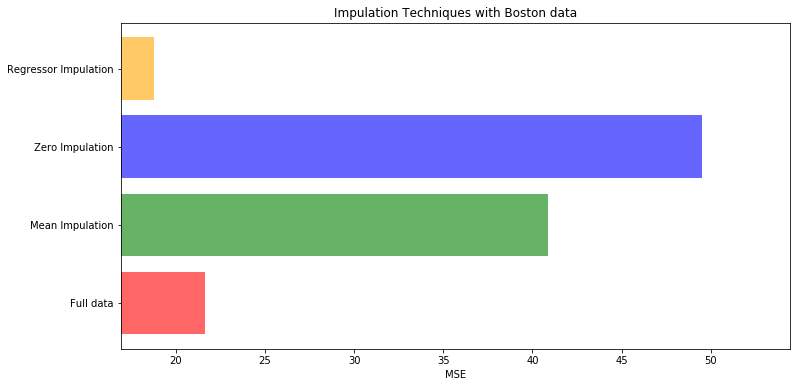

In [105]:
# 画图
x_labels=['Full data','Mean Impulation','Zero Impulation','Regressor Impulation']
colors=['r','g','b','orange']
plt.figure(figsize=(12,6))
ax=plt.subplot(111)
for i in np.arange(len(mse)):
    ax.barh(i,mse[i],color=colors[i],alpha=0.6,align='center')
ax.set_title("Impulation Techniques with Boston data")
ax.set_xlim(left=np.min(mse)*0.9,right=np.max(mse)*1.1)
ax.set_yticks(np.arange(len(mse)))
ax.set_xlabel('MSE')
ax.set_yticklabels(x_labels)
plt.show()
# 随机森林存在过拟合风险

In [1]:
# 随机森林在乳腺癌上分类
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data=load_breast_cancer()

In [3]:
data.target.shape

(569,)

In [4]:
rfc=RandomForestClassifier(n_estimators=100,random_state=90)
score_pre=cross_val_score(rfc,data.data,data.target,cv=10).mean()
score_pre

0.9648809523809524

0.9631265664160402 71


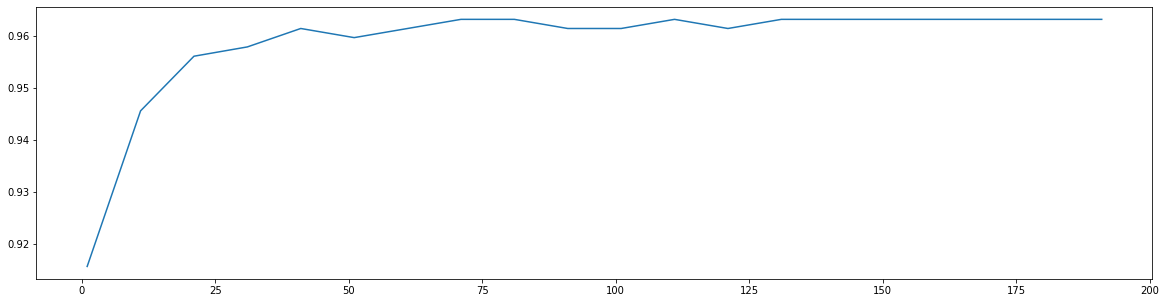

In [5]:
# 第一步粗筛选调整n_estimators 以10为步长
scorel=[]
for i in range(0,200,10):
    rfc=RandomForestClassifier(n_estimators=i+1,n_jobs=-1,random_state=90)
    score=cross_val_score(rfc,data.data,data.target,cv=10).mean()
    scorel.append(score)
print(max(scorel),(scorel.index(max(scorel))*10)+1)

plt.figure(figsize=[20,5])
plt.plot(range(1,201,10),scorel)
plt.show()

0.9666353383458647 73


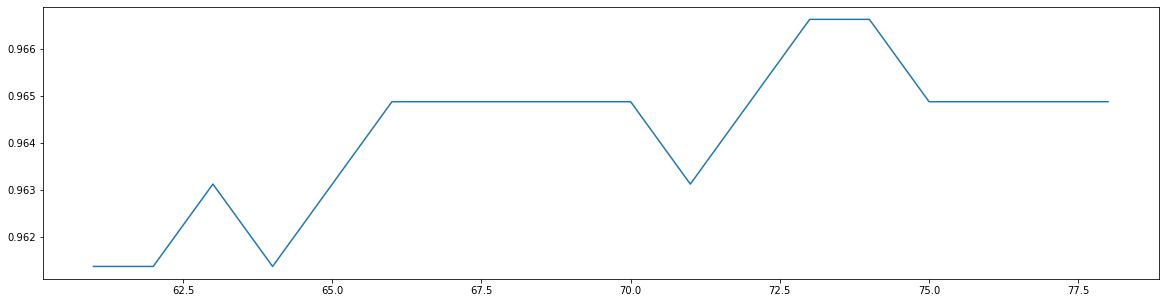

In [6]:
# 第二步 细筛选
scorel=[]
for i in range(61,79):
    rfc=RandomForestClassifier(n_estimators=i,n_jobs=-1,random_state=90)
    score=cross_val_score(rfc,data.data,data.target,cv=10).mean()
    scorel.append(score)
print(max(scorel),([*range(61,79)][scorel.index(max(scorel))]))

plt.figure(figsize=[20,5])
plt.plot(range(61,79),scorel)
plt.show()

In [7]:
# 调整max_depth
param_grid={'max_depth':np.arange(1,20,1)}
rfc=RandomForestClassifier(n_estimators=73,random_state=90)
GS=GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=73, n_jobs=None,
                                              oob_score=False, random_state=90,
                                  

In [8]:
GS.best_params_

{'max_depth': 8}

In [9]:
GS.best_score_

0.9666353383458647

In [11]:
# 调整max_features
param_grid={'max_features':np.arange(1,30,1)}
rfc=RandomForestClassifier(n_estimators=73,random_state=90)
GS=GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=73, n_jobs=None,
                                              oob_score=False, random_state=90,
                                  

In [130]:
GS.best_params_

{'max_features': 24}

In [131]:
GS.best_score_

0.9666666666666668

In [10]:
# 调整min_samples_leaf

param_grid={'min_samples_leaf':np.arange(1,1+10,1)}
rfc=RandomForestClassifier(n_estimators=73,random_state=90,max_features=24)
GS=GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=24,
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=73, n_jobs=None,
                                              oob_score=False, random_state=90,
                                      

In [133]:
GS.best_params_

{'min_samples_leaf': 1}

In [134]:
GS.best_score_

0.9666666666666668

In [135]:
# 调整min_samples_split

param_grid={'min_samples_split':np.arange(2,2+20,1)}
rfc=RandomForestClassifier(n_estimators=73,random_state=90,max_features=24)
GS=GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=24,
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=73, n_jobs=None,
                                              oob_score=False, random_state=90,
                                      

In [136]:
GS.best_params_

{'min_samples_split': 6}

In [137]:
GS.best_score_

0.9701754385964912

In [138]:
# 调整criterion

param_grid={'criterion':['gini','entropy']}
rfc=RandomForestClassifier(n_estimators=73,random_state=90,max_features=24,min_samples_split=6)
GS=GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=24,
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=6,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=73, n_jobs=None,
                                              oob_score=False, random_state=90,
                                      

In [139]:
GS.best_params_

{'criterion': 'gini'}

In [140]:
GS.best_score_

0.9701754385964912

In [144]:
# 调整完毕，得出最佳参数
rfc=RandomForestClassifier(n_estimators=73,random_state=90,max_features=24,min_samples_split=6)
score=cross_val_score(rfc,data.data,data.target,cv=10).mean()
score


0.9701754385964912

In [143]:
score-score_pre

0.005294486215538852